**This notebook contains the code used to train, tune and evaluate each potential binary classifier model, followed by further tuning of the Neural Network.**

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import joblib

# Load the training data
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
train_data['label'] = pd.to_numeric(train_data['label'], downcast='integer', errors='coerce')
X_train_full = train_data.drop('label', axis=1)
y_train_full = train_data['label']

# Load the test data (final evaluation)
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
test_data['label'] = pd.to_numeric(test_data['label'], downcast='integer', errors='coerce')
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

# Create validation split (20%) from training data
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [ ]:
# Functions to evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    start_time = time.time()
    y_pred = model.predict(X_test)
    avg_inference_time = (time.time() - start_time) / len(y_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Average Inference Time: {avg_inference_time:.6f} seconds\n")

    return {
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'inference_time': avg_inference_time
    }

def evaluate_tf_model(model, X_test, y_test, model_name):
    start_time = time.time()
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    avg_inference_time = (time.time() - start_time) / len(y_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Average Inference Time: {avg_inference_time:.6f} seconds")

    return {
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'inference_time': avg_inference_time
    }

In [ ]:
# 1. Logistic Regression
print("Tuning Logistic Regression...")
log_reg_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

best_log_reg = None
best_log_reg_score = 0

for C in log_reg_params['C']:
    model = LogisticRegression(C=C, penalty='l2', solver='liblinear', max_iter=1000)
    model.fit(X_train, y_train)
    val_score = model.score(X_val, y_val)

    if val_score > best_log_reg_score:
        best_log_reg_score = val_score
        best_log_reg = model

    print(f"C: {C}, Validation Accuracy: {val_score:.4f}")

log_reg_metrics = evaluate_model(best_log_reg, X_test, y_test, "Logistic Regression (Tuned)")
joblib.dump(best_log_reg, '/content/drive/MyDrive/Colab Notebooks/logistic_regression_model_tuned.pkl')

Tuning Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C: 0.1, Validation Accuracy: 0.7115


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C: 1, Validation Accuracy: 0.7110


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C: 10, Validation Accuracy: 0.7113
Logistic Regression (Tuned) Metrics:
Accuracy: 0.7113
Precision: 0.7993
Recall: 0.3695
F1 Score: 0.5053
Average Inference Time: 0.000000 seconds



['/content/drive/MyDrive/Colab Notebooks/logistic_regression_model_tuned.pkl']

In [ ]:
# 2. Gradient Boosting
print("Tuning Gradient Boosting Machine...")
gbm_params = {
    'n_estimators': [25, 50, 75],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [2, 3, 4]
}

best_gbm = None
best_gbm_score = 0

for n_est in gbm_params['n_estimators']:
    for lr in gbm_params['learning_rate']:
        for depth in gbm_params['max_depth']:
            model = GradientBoostingClassifier(n_estimators=n_est, learning_rate=lr, max_depth=depth)
            model.fit(X_train, y_train)
            val_score = model.score(X_val, y_val)

            if val_score > best_gbm_score:
                best_gbm_score = val_score
                best_gbm = model

            print(f"n_est: {n_est}, lr: {lr}, depth: {depth}, Val Acc: {val_score:.4f}")

gbm_metrics = evaluate_model(best_gbm, X_test, y_test, "Gradient Boosting Machine (Tuned)")
joblib.dump(best_gbm, '/content/drive/MyDrive/Colab Notebooks/gbm_model_tuned.pkl')

Tuning Gradient Boosting Machine...
n_est: 25, lr: 0.1, depth: 2, Val Acc: 0.8184
n_est: 25, lr: 0.1, depth: 3, Val Acc: 0.8397
n_est: 25, lr: 0.1, depth: 4, Val Acc: 0.8500
n_est: 25, lr: 0.2, depth: 2, Val Acc: 0.8400
n_est: 25, lr: 0.2, depth: 3, Val Acc: 0.8535
n_est: 25, lr: 0.2, depth: 4, Val Acc: 0.8665
n_est: 25, lr: 0.3, depth: 2, Val Acc: 0.8473
n_est: 25, lr: 0.3, depth: 3, Val Acc: 0.8631
n_est: 25, lr: 0.3, depth: 4, Val Acc: 0.8824
n_est: 50, lr: 0.1, depth: 2, Val Acc: 0.8342
n_est: 50, lr: 0.1, depth: 3, Val Acc: 0.8546
n_est: 50, lr: 0.1, depth: 4, Val Acc: 0.8636
n_est: 50, lr: 0.2, depth: 2, Val Acc: 0.8581
n_est: 50, lr: 0.2, depth: 3, Val Acc: 0.8742
n_est: 50, lr: 0.2, depth: 4, Val Acc: 0.8886
n_est: 50, lr: 0.3, depth: 2, Val Acc: 0.8643
n_est: 50, lr: 0.3, depth: 3, Val Acc: 0.8873
n_est: 50, lr: 0.3, depth: 4, Val Acc: 0.9037
n_est: 75, lr: 0.1, depth: 2, Val Acc: 0.8504
n_est: 75, lr: 0.1, depth: 3, Val Acc: 0.8659
n_est: 75, lr: 0.1, depth: 4, Val Acc: 0.880

['/content/drive/MyDrive/Colab Notebooks/gbm_model_tuned.pkl']

In [ ]:
# 3. Random Forest
print("Tuning Random Forest...")
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 20, 40],
    'min_samples_split': [2, 5, 7]
}

best_rf = None
best_rf_score = 0

for n_est in rf_params['n_estimators']:
    for depth in rf_params['max_depth']:
        for min_split in rf_params['min_samples_split']:
            model = RandomForestClassifier(n_estimators=n_est, max_depth=depth,
                                         min_samples_split=min_split, n_jobs=-1)
            model.fit(X_train, y_train)
            val_score = model.score(X_val, y_val)

            if val_score > best_rf_score:
                best_rf_score = val_score
                best_rf = model

            print(f"n_est: {n_est}, depth: {depth}, min_split: {min_split}, Val Acc: {val_score:.4f}")

rf_metrics = evaluate_model(best_rf, X_test, y_test, "Random Forest (Tuned)")
joblib.dump(best_rf, '/content/drive/MyDrive/Colab Notebooks/random_forest_model_tuned.pkl')

Tuning Random Forest...
n_est: 50, depth: None, min_split: 2, Val Acc: 0.9804
n_est: 50, depth: None, min_split: 5, Val Acc: 0.9809
n_est: 50, depth: None, min_split: 7, Val Acc: 0.9806
n_est: 50, depth: 20, min_split: 2, Val Acc: 0.9706
n_est: 50, depth: 20, min_split: 5, Val Acc: 0.9698
n_est: 50, depth: 20, min_split: 7, Val Acc: 0.9696
n_est: 50, depth: 40, min_split: 2, Val Acc: 0.9807
n_est: 50, depth: 40, min_split: 5, Val Acc: 0.9805
n_est: 50, depth: 40, min_split: 7, Val Acc: 0.9806
n_est: 100, depth: None, min_split: 2, Val Acc: 0.9807
n_est: 100, depth: None, min_split: 5, Val Acc: 0.9808
n_est: 100, depth: None, min_split: 7, Val Acc: 0.9808
n_est: 100, depth: 20, min_split: 2, Val Acc: 0.9702
n_est: 100, depth: 20, min_split: 5, Val Acc: 0.9712
n_est: 100, depth: 20, min_split: 7, Val Acc: 0.9704
n_est: 100, depth: 40, min_split: 2, Val Acc: 0.9810
n_est: 100, depth: 40, min_split: 5, Val Acc: 0.9810
n_est: 100, depth: 40, min_split: 7, Val Acc: 0.9809
n_est: 200, depth: 

['/content/drive/MyDrive/Colab Notebooks/random_forest_model_tuned.pkl']

Tuning TensorFlow Neural Network...
Starting hyperparameter tuning...

Testing: lr=0.001, dropout=0.2, units=128


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3321/3321 ━━━━━━━━━━━━━━━━━━━━ 69s 4ms/step - accuracy: 0.8198 - loss: 0.4047 - val_accuracy: 0.8757 - val_loss: 0.3059
Epoch 2/10
3321/3321 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8708 - loss: 0.3178 - val_accuracy: 0.8946 - val_loss: 0.2673
Epoch 3/10
3321/3321 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.8846 - loss: 0.2923 - val_accuracy: 0.9034 - val_loss: 0.2497
Epoch 4/10
3321/3321 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8924 - loss: 0.2774 - val_accuracy: 0.9086 - val_loss: 0.2396
Epoch 5/10
3321/3321 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8977 - loss: 0.2679 - val_accuracy: 0.9131 - val_loss: 0.2289
Epoch 6/10
3321/3321 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9001 - loss: 0.2619 - val_accuracy: 0.9174 - val_loss: 0.2227
Epoch 7/10
3321/3321 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9032 - loss: 0.2558 - val_accuracy: 0.9196 - val_loss: 0.2181
Epoch 8/10
3321/3321 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9048 - loss: 0


TensorFlow Neural Network (Tuned) Metrics:
Accuracy: 0.9464
Precision: 0.9665
Recall: 0.8969
F1 Score: 0.9304
Average Inference Time: 0.000058 seconds


KeyError: 'val_accuracy'

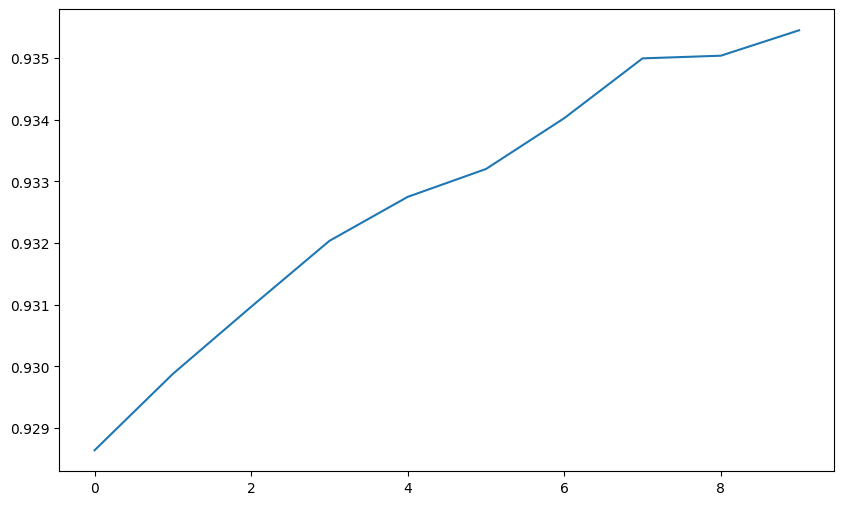

In [ ]:
# 4. Neural Network (3 Hidden Layers)
print("Tuning TensorFlow Neural Network...")

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameter search space
learning_rates = [0.001, 0.0005, 0.0001]
dropout_rates = [0.2, 0.3, 0.4]
hidden_units = [128, 192, 256]

best_accuracy = 0
best_params = {}
best_model = None

print("Starting hyperparameter tuning...\n")

# Simple grid search over 3 hyperparameters
for lr in learning_rates:
    for dropout in dropout_rates:
        for units in hidden_units:

            print(f"Testing: lr={lr}, dropout={dropout}, units={units}")

            # Build model with current hyperparameters
            model = Sequential([
                Dense(units, activation='relu', input_shape=(X_train.shape[1],)),
                Dropout(dropout),

                Dense(int(units*0.5), activation='relu'),
                Dropout(dropout),

                Dense(int(units*0.25), activation='relu'),
                Dropout(dropout),

                Dense(1, activation='sigmoid')
            ])

            model.compile(
                optimizer=Adam(learning_rate=lr),
                loss='binary_crossentropy',
                metrics=['accuracy']
            )

            history = model.fit(
                X_train,
                y_train,
                epochs=10,
                batch_size=128,
                validation_split=0.2,
                verbose=1
            )

            # Evaluate on validation set
            val_accuracy = history.history['val_accuracy'][-1]
            print(f"Validation accuracy: {val_accuracy:.4f}")

            # Save if best model
            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_params = {
                    'learning_rate': lr,
                    'dropout_rate': dropout,
                    'hidden_units': units
                }
                best_model = model
                print("New best model found!\n")

# Train best model on full training data
print("\nTraining best model on full dataset...")
print(f"Best parameters: {best_params}")

history = best_model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=128,
    verbose=1
)

print(f"\nSelected configuration:")
print(f"- Learning rate: {best_params['learning_rate']}")
print(f"- Dropout rate: {best_params['dropout_rate']}")
print(f"- Hidden units: {best_params['hidden_units']}")

# Evaluate best model
tf_metrics = evaluate_tf_model(best_model, X_test, y_test, "TensorFlow Neural Network (Tuned)")

# Save best model
best_model.save('/content/drive/MyDrive/Colab Notebooks/tf_neural_network_model_tuned.h5')

**Further tuning and evaluation of the Neural Network binary classifier:**

In [3]:
!pip install tensorflowjs
!pip install keras_tuner
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import tensorflowjs as tfjs
import pandas as pd

# Load the training data
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']

# Load the test data
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

# Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a model builder function for Keras Tuner
def model_builder(hp):
    model = Sequential()
    # Input layer
    model.add(Dense(
        units=hp.Int('units_input', min_value=128, max_value=512, step=64),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_input', min_value=0.1, max_value=0.5, step=0.1)))

    # Hidden layer
    for i in range(hp.Int('num_hidden_layers', 1, 3)):
        model.add(Dense(
            units=hp.Int(f'units_hidden_{i}', min_value=64, max_value=256, step=64),
            activation='relu',
            kernel_regularizer=l2(hp.Choice(f'l2_hidden_{i}', values=[0.001, 0.01, 0.1]))
        ))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float(f'dropout_hidden_{i}', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[0.001, 0.0005, 0.0001])),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    )
    return model

# Initialize Keras Tuner
tuner = kt.Hyperband(
    model_builder,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='my_tuning',
    project_name='binary_classification'
)

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Perform the search
tuner.search(X_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping])

# Retrieve the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

# Train the best model
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

# Convert and save the model to TensorFlow.js format
tfjs.converters.save_keras_model(model, '/content/drive/MyDrive/Colab Notebooks/tuned_classifier')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
384               |384               |units_input
0.1               |0.1               |dropout_input
2                 |2                 |num_hidden_layers
64                |64                |units_hidden_0
0.01              |0.01              |l2_hidden_0
0.1               |0.1               |dropout_hidden_0
0.0001            |0.0001            |learning_rate
3                 |3                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/3
 5314/16604 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step - accuracy: 0.7891 - loss: 1.3212 - precision: 0.7335 - recall: 0.7425

KeyboardInterrupt: 